# Escolhendo o melhor estimador para a matriz de covariância entre:
- Covariância Amostral
- Constant Correlation Model
- Shrinkage
- Exponentially Weighted Moving Average (EWMA)
- EWMA Ortogonal
- Modelos GARCH
- Modelos GARCH Ortogonais

A fim de medirmos qual é o melhor estimador utilizaremos o Global Minimum Variance (GMV) como esquema de balanceamento dos ativos. Além disso, faremos a estimação da matriz de covariância anualmente, e mensalmente faremos o rebalanceamento aos pesos originais de cada ativo.

# Os dados

Os dados foram retirados do site https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html e apresenta os retornos mensais por portfólio, sendo que cada portfólio é montado com todos as ações de uma mesma indústria com pesos iguais. Utilizaremos os dados a partir do ano 1980.

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import functions1 as fn
import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2
inds = ['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other']

ind_rets = fn.get_ind_returns(weighting="ew", n_inds=49)["1980":]
#ind_rets = fn.get_ind_returns(weighting="ew", n_inds=49)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
ind_rets.head()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
1980-01,0.2051,0.0614,0.0470,0.1286,0.0236,0.1222,0.0919,0.0443,0.0885,0.0828,...,0.0842,0.1227,0.0721,0.0473,0.0642,0.0197,0.0479,0.1309,0.0672,0.1081
1980-02,0.0715,-0.0160,-0.0503,-0.0214,-0.0192,0.0112,-0.0216,-0.0328,-0.0357,-0.0150,...,-0.0305,-0.0279,0.0231,-0.0316,-0.0258,-0.0552,-0.0373,0.0105,-0.0188,0.0195
1980-03,-0.2159,-0.1433,-0.1131,-0.1860,-0.0777,-0.1887,-0.1451,-0.1255,-0.1521,-0.1105,...,-0.1633,-0.1483,-0.1570,-0.1460,-0.1617,-0.1227,-0.1307,-0.2064,-0.1338,-0.1733
1980-04,0.0520,0.0692,0.0377,0.0537,0.1131,0.0439,0.0618,0.0502,0.0472,0.0179,...,0.0432,0.0100,0.0307,0.0398,0.0590,0.0961,0.0673,0.0998,0.0715,0.0539
1980-05,0.0346,0.0915,0.1283,0.0971,0.1089,0.0865,0.0364,0.0734,0.0726,0.0538,...,0.0773,0.0770,0.0533,0.1004,0.0760,0.0854,0.0711,0.1259,0.0777,0.0735


# Covariância Amostral

Neste método, utilizaremos todo o histórico de retornos dos últimos 5 anos, ou seja, no tempo $T$ utiliza-se todos os retornos $t$, onde $T-60 \le t \lt T$.

In [4]:
mv_sc_a = fn.backtest_ws(ind_rets, estimation_window=60, weighting=fn.weight_gmv, modified=True, freq='annually', cov_estimator = fn.sample_cov)

In [5]:
mv_sc_m = fn.backtest_ws(ind_rets, estimation_window=60, weighting=fn.weight_gmv, modified=True, cov_estimator = fn.sample_cov)

In [17]:
mv_cc_a = fn.backtest_ws(ind_rets, estimation_window=60, weighting=fn.weight_gmv, modified=True, freq='annually', cov_estimator = fn.cc_cov)

In [18]:
mv_shrink_a = fn.backtest_ws(ind_rets, estimation_window=60, weighting=fn.weight_gmv, modified=True, freq='annually', cov_estimator = fn.shrinkage_cov)

In [6]:
mv_ewma_a = fn.backtest_ws(ind_rets, estimation_window=60, weighting=fn.weight_gmv, modified=True, freq='annually', cov_estimator = fn.ewma_cov)

In [7]:
mv_ewma_m = fn.backtest_ws(ind_rets, estimation_window=60, weighting=fn.weight_gmv, modified=True, cov_estimator = fn.ewma_cov)

In [11]:
mv_orth_ewma_a = fn.backtest_ws(ind_rets, estimation_window=60, weighting=fn.weight_gmv, modified=True, freq='annually', cov_estimator=fn.orthogonal_ewma_cov)

In [12]:
mv_orth_ewma_m = fn.backtest_ws(ind_rets, estimation_window=60, weighting=fn.weight_gmv, modified=True, cov_estimator=fn.orthogonal_ewma_cov)

In [13]:
mv_garch_a = fn.backtest_ws(ind_rets, estimation_window=60, weighting=fn.weight_gmv, modified=True, freq='annually', cov_estimator=fn.garch_univariate, bestGARCH=True)

/Users/viniciussaurin/opt/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:605: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit exceeded
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
/Users/viniciussaurin/opt/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:605: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit exceeded
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
/Users/viniciussaurin/opt/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:605: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit exceeded
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
/Users/viniciussaurin/opt/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:605: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit exceeded
See scipy.optimize.fmin_slsqp for code meaning.

In [14]:
mv_ogarch_skew_st_a = fn.backtest_ws(ind_rets, estimation_window=60, weighting=fn.weight_gmv, modified=True, freq='annually', cov_estimator=fn.orthogonal_garch_cov, percent_explained=90.0, dist='SkewStudent', bestGARCH=True)

/Users/viniciussaurin/opt/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:605: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
/Users/viniciussaurin/opt/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:605: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
/Users/viniciussaurin/opt/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:605: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit exceeded
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
/Users/viniciussaurin/opt/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:605: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.opti

/Users/viniciussaurin/opt/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:605: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
/Users/viniciussaurin/opt/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:605: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
/Users/viniciussaurin/opt/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:605: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit exceeded
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
/Users/viniciussaurin/opt/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:605: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for lin

/Users/viniciussaurin/opt/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:605: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit exceeded
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
/Users/viniciussaurin/opt/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:605: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit exceeded
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
/Users/viniciussaurin/opt/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:605: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit exceeded
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
/Users/viniciussaurin/opt/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:605: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit exceeded
See scipy.optimize.fmin_slsqp for code meaning.

/Users/viniciussaurin/opt/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:605: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit exceeded
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
/Users/viniciussaurin/opt/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:605: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit exceeded
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
/Users/viniciussaurin/opt/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:605: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit exceeded
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
/Users/viniciussaurin/opt/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:605: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit exceeded
See scipy.optimize.fmin_slsqp for code meaning.

In [15]:
mv_ogarch_a = fn.backtest_ws(ind_rets, estimation_window=60, weighting=fn.weight_gmv, modified=True, freq='annually', cov_estimator=fn.orthogonal_garch_cov, percent_explained=90.0, bestGARCH=True)

In [19]:
ewr = fn.backtest_ws(ind_rets, estimation_window=60, weighting=fn.weight_ew, modified=True, freq='annually')

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown,Average ENC,Average ENCB
EW,0.108442,0.185843,-0.589426,7.398822,0.081924,0.122265,0.410580,-0.598060,49.000,46.987
Sample,0.113615,0.117993,-0.861041,5.444031,0.052539,0.078528,0.689601,-0.544074,2.080,2.662
Constant,0.107370,0.114862,-1.013352,5.594823,0.052547,0.078572,0.655482,-0.526302,1.574,2.063
Shrinkage,0.105589,0.114671,-0.939687,5.340014,0.052150,0.077930,0.641459,-0.536625,1.714,2.166
EWMA,0.118940,0.117419,-0.948851,6.270737,0.052019,0.077525,0.737115,-0.491506,2.068,2.713
OEWMA,0.118945,0.117417,-0.948841,6.270582,0.052017,0.077523,0.737176,-0.491511,2.068,2.713
GARCH,0.113846,0.167741,-0.850052,8.058936,0.075417,0.112490,0.486300,-0.577415,29.351,34.986
OGARCH,0.108885,0.120143,-0.856191,5.400142,0.053995,0.080474,0.638929,-0.514241,1.955,2.649
OGARCH-SKST,0.112766,0.118985,-0.904817,5.718268,0.053302,0.079903,0.676905,-0.529318,1.957,2.562


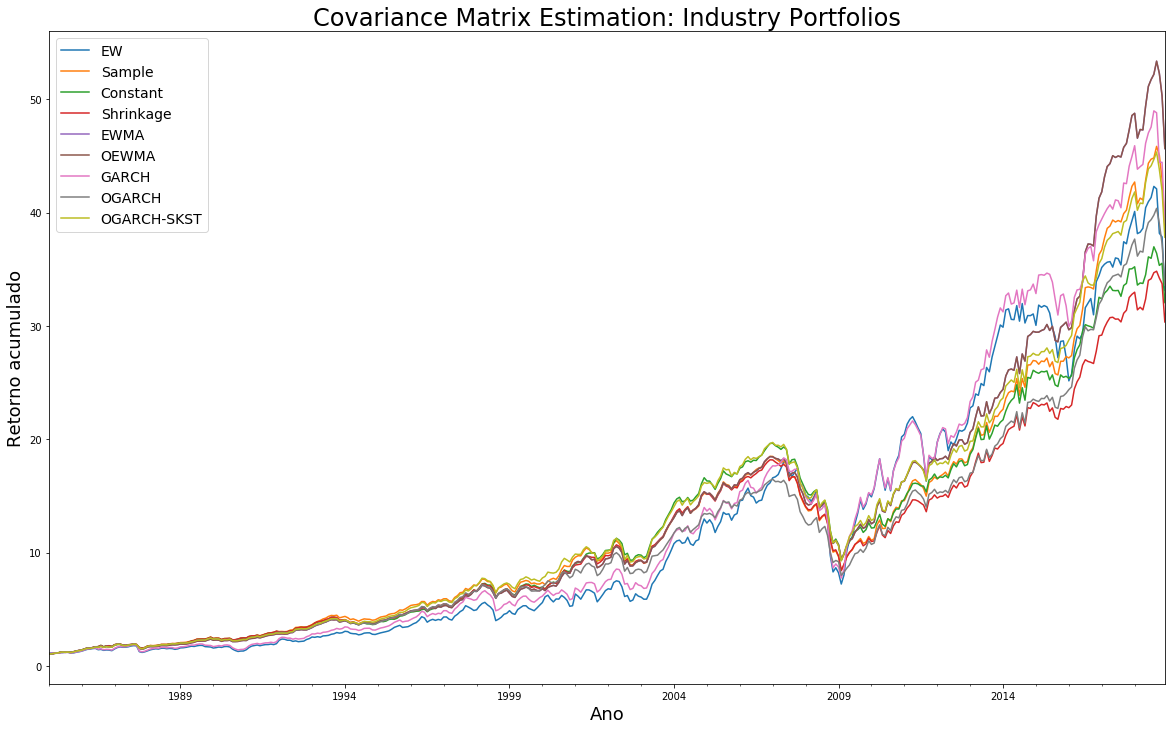

In [39]:
bt = pd.DataFrame({"EW":ewr,
                   "Sample": mv_sc_a,
                   "Constant": mv_cc_a,
                   "Shrinkage": mv_shrink_a,
                   "EWMA":mv_ewma_a,
                   "OEWMA":mv_orth_ewma_a,
                   "GARCH":mv_garch_a,
                   "OGARCH":mv_ogarch__a,
                   "OGARCH-SKST":mv_ogarch_skew_st_a
                   })
btr = pd.DataFrame([bt.iloc[0,i] for i in range(0,bt.shape[1])], index=bt.columns).T.dropna()
btw = pd.DataFrame([bt.iloc[1,i] for i in range(0,bt.shape[1])], index=bt.columns).T
fig = (1+btr).cumprod().plot(figsize=(20,12), title="Covariance Matrix Estimation: Industry Portfolios")
fig.set_title("Covariance Matrix Estimation: Industry Portfolios", fontsize=24)
fig.set_ylabel('Retorno acumulado', fontsize=18)
fig.set_xlabel('Ano', fontsize=18)
plt.legend(fontsize=14)
plt.savefig('CovarianceMatrix')
#plt.show();
fn.summary_stats(btr, btw, returns=ind_rets)

In [40]:
x = fn.summary_stats(btr, btw, returns=ind_rets)
x.to_html(justify='center')